In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler

import statsmodels.discrete.discrete_model as sm
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler


from sklearn.pipeline import Pipeline, make_pipeline

**Load Data**

In [2]:
train = pd.read_csv('/content/train.csv')
train.head(5)
del train['Ticket']

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


**Step I: Exploratory Data Analysis**

In [4]:
train.dtypes, train.shape, train.describe()

(PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object,
 (891, 11),
        PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
 count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
 mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
 std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
 min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
 25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
 50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
 75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
 max     891.000000    1.000

In [5]:
pd.DataFrame({'Survivers': [True]}).bool()

True

In [6]:
survivers = train.loc[(train['Survived']==True)]

In [8]:
print('Number of Survivers in the train-data-set:', survivers['Survived'].size)

Number of Survivers in the train-data-set: 342


In [9]:
no_of_survivers = survivers['Survived'].size

In [10]:
dead = train.loc[(train['Survived']==False)]
dead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  549 non-null    int64  
 1   Survived     549 non-null    int64  
 2   Pclass       549 non-null    int64  
 3   Name         549 non-null    object 
 4   Sex          549 non-null    object 
 5   Age          424 non-null    float64
 6   SibSp        549 non-null    int64  
 7   Parch        549 non-null    int64  
 8   Fare         549 non-null    float64
 9   Cabin        68 non-null     object 
 10  Embarked     549 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 51.5+ KB


In [11]:
no_of_dead = dead['Survived'].size
print('Numer of drowned Passengers in the train-data-set:' ,no_of_dead)

Numer of drowned Passengers in the train-data-set: 549


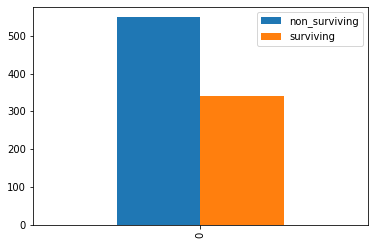

In [12]:
train_plot = ({'non_surviving':[no_of_dead], 'surviving':[no_of_survivers]})
train_plot_2 = pd.DataFrame(data=train_plot)
df = train_plot_2.plot.bar()

Text(0.5, 1.0, 'Number of Passangers in each class')

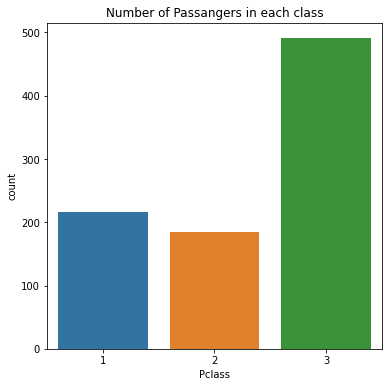

In [61]:
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.countplot(x='Pclass', data=train) #number of passengers in each class

ax.set_title('Number of Passangers in each class')

**Imputation of missing data**

In [4]:
imputer = SimpleImputer(strategy='most_frequent') # for the Column embarked the heatmap showed a missing value, 
#hence the missing value is added on the case of the most frequent value
imputer.fit(train[['Embarked']])        # learn the most frequent value
imputer.transform(train[['Embarked']]) # transform the column
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C


In [5]:
train_age = train.fillna(train.mean()) #Moreover the exploration phase showed, that in the age columen different values are missing
#in order to not alter the data to much, the mean age is calculated and attributed to the missing values
train_age.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,NaN,C


**More EDA**

Which passenger class embarked from which port mostly. Is it possible to draw any conclusion out of the embarkment column.

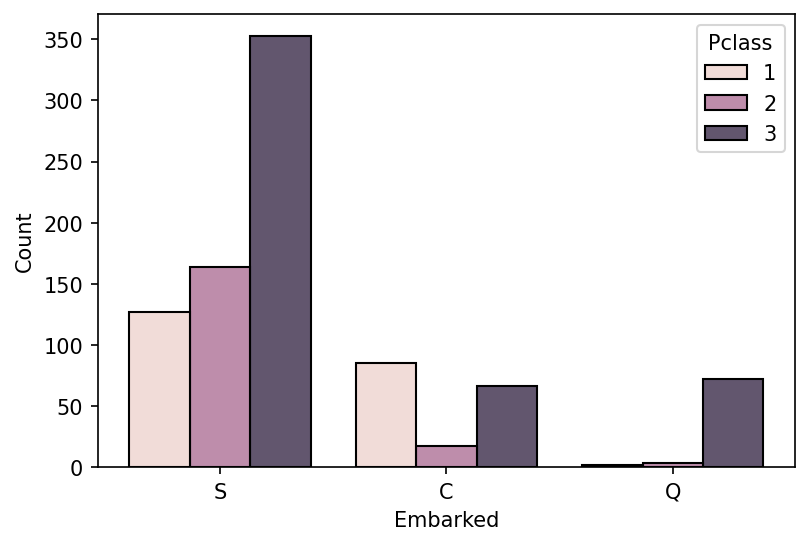

In [29]:
plt.figure(dpi=150)

sns.histplot(data=train_age, x='Embarked', hue='Pclass', multiple="dodge", shrink=.8)

**City of Southhampton:** 
Port of Southhampton was for the Passengers coming from London the closest Port to reach.
Allthoug the first embarkment of the HMS Titanic on their first leg to New York took place at Southhampton 

**Cherbourg (France):** Since the harbour was at that time to small for the big ship, the titanic anchored in front of the harbour and couple of passengers (15 1st class and seven 2nd class) left the titanic and were transfered by little boats to the mainland. 

**Queenstown (Ireland):** Again the Titanic could not enter the harbour and had to anchor in front of it. Again seven 1st class passengers, which had embarked the titanic in France left the ship and in return 113 3rd class and seven 2nd class passengers embarked in Ireland. 

*Now it's time to apply the imputed data on the data set*


In [6]:
train_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C148,C


**Fetch the data from the DataFrame**

In [47]:
X_train = train_age[['Pclass','Age']] #fetch the numeric data from the df and create a new df as X
y_train = train_age['Survived']

**Split the Dataset**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,  test_size= 0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 2), (223, 2), (668,), (223,))

**Columtransfer / Scaling**

in order to apply the age-feature to the model, one has first to transform the numerical data of the age column 

Use the MinMaxScaler from sklearn

In [19]:
scaler = MinMaxScaler()

In [49]:
cols_min_max = X_train[['Age']] #1. scale age-Data of X_train

In [ ]:
scaler.fit(cols_min_max)               # learn the min and max of the age values
X_trans = scaler.transform(cols_min_max)     # apply the transformation to the data
X_trans

In [51]:
cols_scaled = pd.DataFrame(X_trans, columns=cols_min_max.columns) #transformation of the age column in X_train
cols_scaled.head(10)

,Age
0,0.243666
1,0.394933
2,0.533594
3,0.231060
4,0.365929
5,0.344510
6,0.365929
7,0.495777
8,0.331905
9,0.457960


In [52]:
scaler.fit(X_train[['Age']])
scaler.transform(X_train[['Age']])

X_train.head(10)


,Pclass,Age
378,3,20.000000
657,3,32.000000
314,2,43.000000
291,1,19.000000
77,3,29.699118
392,3,28.000000
324,3,29.699118
319,1,40.000000
321,3,27.000000
137,1,37.000000


In a second step the scaling of the age column in the X_test dataset is done:

In [53]:
cols_min_max = X_test[['Age']]

In [ ]:
scaler.fit(cols_min_max)               
X_trans = scaler.transform(cols_min_max)     
X_trans

In [55]:
scaler.transform(X_test[['Age']])

X_test.head(10)

,Pclass,Age
478,3,22.000000
819,3,10.000000
868,3,29.699118
88,1,23.000000
4,3,35.000000
762,3,20.000000
302,3,19.000000
691,3,4.000000
408,3,21.000000
76,3,29.699118


**One-Hot-Encoding (I.)**

In this step I will fit and transform the X_train values of Pclass

In [56]:
one_hot = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [57]:
cols = X_train[['Pclass']]

In [58]:
one_hot.fit(cols)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [59]:
X_trans = one_hot.transform(cols)
X_trans 

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [60]:
Pclass_sex = pd.DataFrame(X_trans, columns=one_hot.get_feature_names())
Pclass_sex.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_1,x0_2,x0_3
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [61]:
one_hot.fit(X_train[['Pclass']])           # learn the categories
one_hot.transform(X_train[['Pclass']])     # apply the transformation
X_train.head()

,Pclass,Age
378,3,20.000000
657,3,32.000000
314,2,43.000000
291,1,19.000000
77,3,29.699118


**One-Hot-Encoding (Part II.)**

In addition in a second step as well as the X_test values needs to be transformed

In [62]:
one_hot.transform(X_test[['Pclass']])
X_test.shape

(223, 2)

**Fit the Logistic Regression classification model**

In [63]:
m = LogisticRegression()
m.fit(X_train,y_train)

LogisticRegression()

In [64]:
m.coef_, m.intercept_

(array([[-1.02619657, -0.03358885]]), array([2.8664677]))

In [65]:
m.predict_proba(X_train)

array([[0.70762953, 0.29237047],
       [0.78363307, 0.21636693],
       [0.65254522, 0.34745478],
       ...,
       [0.30096392, 0.69903608],
       [0.22519026, 0.77480974],
       [0.69353991, 0.30646009]])

In [ ]:
m.predict_proba(X_test)


**In a next stept the model needs to be tested on overfitting or underfitting in regard to the accuracy of the applied regression model**

In [67]:
m.score(X_train,y_train) #calculation of the train_data accuracy 
print('The accuracy for the training_data in percentage points:', (m.score(X_train,y_train)*100))

The accuracy for the training_data in percentage points: 69.76047904191617


In [68]:
m.score(X_test,y_test) #calculation of the test_data accuracy
print('The accuracy for the test_data in percentage points:', (m.score(X_test,y_test)*100))

The accuracy for the test_data in percentage points: 71.74887892376681


In [69]:
ypred = m.predict(X_test) # another way of computing accuracy and we are going to do it for test data 
accuracy_score(y_test,ypred) 

0.7174887892376681

**Confusion Matrix**

In [70]:
conf = confusion_matrix(y_test,ypred) #how does the model right now predict the number of dead people
conf      #it shows that the model predicts 53 passengers falesly as dead

array([[116,  22],
       [ 41,  44]])

**Cross-Validation with precision / recall**

In [81]:
cv = cross_validate(m, X_train, y_train,
                    cv=10,
                    scoring='accuracy',
                    return_train_score=True
)

In [80]:
cv_precision = cross_validate(m, X_train, y_train,
                    cv=10,
                    scoring='precision',
                    return_train_score=True
)

In [74]:
cv_recall = cross_validate(m, X_train, y_train,
                    cv=10,
                    scoring='recall',
                    return_train_score=True
)

In [82]:
cv_accuracy = pd.DataFrame(cv)

In [83]:
print(cv_accuracy)

   fit_time  score_time  test_score  train_score
0  0.010695    0.001919    0.746269     0.688852
1  0.008579    0.001800    0.656716     0.697171
2  0.008206    0.001712    0.686567     0.697171
3  0.008596    0.001773    0.701493     0.695507
4  0.008726    0.001748    0.731343     0.690516
5  0.008007    0.001742    0.701493     0.695507
6  0.006773    0.001746    0.656716     0.702163
7  0.007890    0.001724    0.641791     0.698835
8  0.007578    0.001746    0.651515     0.702658
9  0.007495    0.001796    0.727273     0.694352


In [81]:
cv_precision = pd.DataFrame(cv_precision)
print(cv_precision)

   fit_time  score_time  test_score  train_score
0  0.007504    0.002460    0.473684     0.666667
1  0.005244    0.002409    0.647059     0.644295
2  0.004754    0.002306    0.714286     0.638158
3  0.004691    0.002678    0.583333     0.654930
4  0.007324    0.002301    0.769231     0.633987
5  0.004469    0.002277    0.736842     0.632653
6  0.004676    0.002490    0.529412     0.657718
7  0.004482    0.002292    0.857143     0.625000
8  0.004795    0.002270    0.500000     0.657895
9  0.004803    0.002302    0.733333     0.635762
